# Objet

Répétition du cours N° 17 - [PANDAS PYTHON Français - Introduction + Analyse du Titanic](https://www.youtube.com/watch?v=zZkNOdBWgFQ)

# Libs

In [1]:
import os
from ml_jpy_commons import *

[project_dir]\data\ exists
[project_dir]\data\csv\ exists


# Chargement des données

In [16]:
import pandas as pd
titanic_filename = 'titanic3.xls'
titanic_filepath = os.path.join(xls_data_dir, titanic_filename)
titanic = pd.read_excel(titanic_filepath)
display(titanic)

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1304,3,0,"Zabour, Miss. Hileni",female,14.5000,1,0,2665,14.4542,NaN,C,NaN,328.0,NaN
1305,3,0,"Zabour, Miss. Thamine",female,NaN,1,0,2665,14.4542,NaN,C,NaN,NaN,NaN
1306,3,0,"Zakarian, Mr. Mapriededer",male,26.5000,0,0,2656,7.2250,NaN,C,NaN,304.0,NaN
1307,3,0,"Zakarian, Mr. Ortin",male,27.0000,0,0,2670,7.2250,NaN,C,NaN,NaN,NaN


# Nettoyage

In [17]:
print(bold('shape'), ':', titanic.shape)
print(bold('columns'), ':', titanic.columns)
titanic = titanic[titanic.columns[:5]]
titanic.drop(columns=['name'], inplace=True)
display(titanic)

shape : (1309, 14)
columns : Index(['pclass', 'survived', 'name', 'sex', 'age', 'sibsp', 'parch', 'ticket',
       'fare', 'cabin', 'embarked', 'boat', 'body', 'home.dest'],
      dtype='object')


,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000
...,...,...,...,...
1304,3,0,female,14.5000
1305,3,0,female,NaN
1306,3,0,male,26.5000
1307,3,0,male,27.0000


In [18]:
display(titanic.index)
titanic.describe()

RangeIndex(start=0, stop=1309, step=1)

,pclass,survived,age
count,1309.000000,1309.000000,1046.000000
mean,2.294882,0.381971,29.881135
std,0.837836,0.486055,14.413500
min,1.000000,0.000000,0.166700
25%,2.000000,0.000000,21.000000
50%,3.000000,0.000000,28.000000
75%,3.000000,1.000000,39.000000
max,3.000000,1.000000,80.000000


In [19]:
# titanic.fillna(titanic['age'].mean())
titanic.dropna(inplace=True)
titanic.describe()
display(titanic)

,pclass,survived,sex,age
0,1,1,female,29.0000
1,1,1,male,0.9167
2,1,0,female,2.0000
3,1,0,male,30.0000
4,1,0,female,25.0000
...,...,...,...,...
1301,3,0,male,45.5000
1304,3,0,female,14.5000
1306,3,0,male,26.5000
1307,3,0,male,27.0000


In [20]:
# cf. le commentaire que j'ai laissé sur la vidéo
display(titanic.index[40:])
display(titanic.iloc[40:50])
display(titanic.loc[40:50])

Int64Index([  43,   44,   45,   47,   48,   49,   50,   51,   52,   53,
            ...
            1295, 1296, 1298, 1299, 1300, 1301, 1304, 1306, 1307, 1308],
           dtype='int64', length=1006)

,pclass,survived,sex,age
43,1,1,female,60.0
44,1,1,female,41.0
45,1,0,male,45.0
47,1,1,male,42.0
48,1,1,female,53.0
49,1,1,male,36.0
50,1,1,female,58.0
51,1,0,male,33.0
52,1,0,male,28.0
53,1,0,male,17.0


,pclass,survived,sex,age
41,1,1,female,44.0
42,1,1,female,59.0
43,1,1,female,60.0
44,1,1,female,41.0
45,1,0,male,45.0
47,1,1,male,42.0
48,1,1,female,53.0
49,1,1,male,36.0
50,1,1,female,58.0


# Feature engineering

In [15]:
display(titanic)

,pclass,survived,sex,age
0,1,1,1,1.0
1,0,0,0,0.0
2,0,0,0,0.0
3,2,2,2,2.0
4,1,1,1,1.0
...,...,...,...,...
1301,3,3,3,3.0
1304,0,0,0,0.0
1306,1,1,1,1.0
1307,1,1,1,1.0


In [22]:
# méthode 1
age = titanic.age
titanic.loc[age < 20, 'age'] = 0
titanic.loc[(20 <= age) & (age < 30), 'age'] = 1
titanic.loc[(30 <= age) & (age < 40), 'age'] = 2
titanic.loc[40 <= age, 'age'] = 3
display(titanic)
display(titanic.age.value_counts())

,pclass,survived,sex,age
0,1,1,female,1.0
1,1,1,male,0.0
2,1,0,female,0.0
3,1,0,male,2.0
4,1,0,female,1.0
...,...,...,...,...
1301,3,0,male,3.0
1304,3,0,female,0.0
1306,3,0,male,1.0
1307,3,0,male,1.0


1.0    344
3.0    245
2.0    232
0.0    225
Name: age, dtype: int64

In [21]:
# méthode 2
def assign_class(age):
    if age < 20:
        return 0
    elif age < 30:
        return 1
    elif age < 40:
        return 2
    else:
        return 3


titanic.age = titanic.age.apply(assign_class)
display(titanic)

,pclass,survived,sex,age
0,1,1,female,1
1,1,1,male,0
2,1,0,female,0
3,1,0,male,2
4,1,0,female,1
...,...,...,...,...
1301,3,0,male,3
1304,3,0,female,0
1306,3,0,male,1
1307,3,0,male,1


3    501
1    284
2    261
Name: pclass, dtype: int64

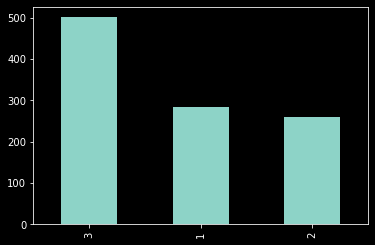

In [23]:
vc = titanic['pclass'].value_counts()
display(vc)
vc.plot.bar(); plt.show()

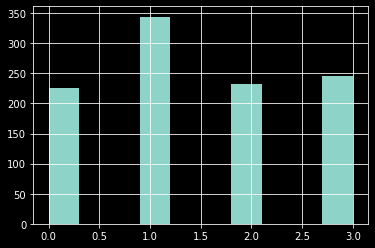

In [24]:
titanic['age'].hist(); plt.show()

In [25]:
titanic.groupby(['sex', 'pclass']).mean()

survived       age
sex    pclass                    
female 1       0.962406  1.947368
       2       0.893204  1.349515
       3       0.473684  0.927632
male   1       0.350993  2.245033
       2       0.145570  1.563291
       3       0.169054  1.197708